## Author : Chintamani Kasture
## The Spark Foundation.
### Task 5 : Exploratory Data Analysis - Sports
### Objevtives
#### 1)Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
#### 2)As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
#### 3)Suggest teams or players a company should endorse for its products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
match = pd.read_csv('matches.csv')
balls = pd.read_csv('deliveries.csv')

In [3]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
balls.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
match.drop('umpire3',axis=1,inplace=True)

Here we see that umpire3 column have most null values so we decide to drop that column

In [9]:
match.loc[match['city'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


Here we are displaying the records with null value in city colimn

In [10]:
match['city'].fillna('Abu Dhabi',inplace=True)

Here we have replaced nulls in city column with Abu Dhabi

In [11]:
match.loc[match['winner'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


Here we are displaying the records with null value in winner column

In [12]:
match['winner'].fillna('No Result',inplace=True)

Here we have replaced nulls in winner column with No result

In [13]:
match.loc[match['player_of_match'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,No Result,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,No Result,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,No Result,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,No Result,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


Here we are displaying the records with nulls in player_of_match column

In [14]:
match['player_of_match'].fillna('No',inplace=True)

Here we have replaced nulls in player_of_match column with No

In [15]:
match.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            2
umpire2            2
dtype: int64

In [16]:
match['umpire1'].value_counts()

HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
                   ..
SJA Taufel          1
Ulhas Gandhe        1
A Nanda Kishore     1
SL Shastri          1
Sundaram Ravi       1
Name: umpire1, Length: 61, dtype: int64

In [17]:
match['umpire1'].fillna('HDPK Dharmasena',inplace=True)

Here we have replaced nulls in umpire1 column with HDPK Dharmasena

In [18]:
match['umpire2'].value_counts()

S Ravi                   57
C Shamshuddin            57
SJA Taufel               54
RJ Tucker                38
CK Nandan                36
                         ..
SJ Davis                  1
Kumar Dharmasena          1
Ian Gould                 1
JD Cloete                 1
KN Ananthapadmanabhan     1
Name: umpire2, Length: 65, dtype: int64

In [19]:
match['umpire2'].fillna('C Shamshuddin',inplace=True)

Here we have replaced nulls in umpire1 column with C Shamshuddin

In [20]:
match.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [21]:
match['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [22]:
match.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
match.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
match.replace('Pune Warriors','Rising Pune Supergiants',inplace=True)
match.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)

Here we have replaced the old team names with new team names

In [23]:
match['team1'].value_counts()

Sunrisers Hyderabad            106
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Capitals                  78
Rajasthan Royals                67
Rising Pune Supergiants         35
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [24]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin


In [25]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
dtypes: int64(5), object(12)
memory usag

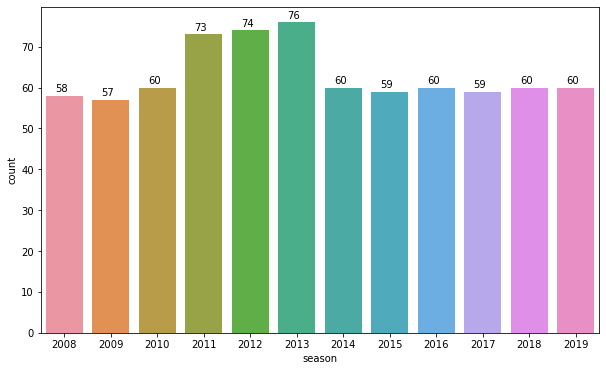

In [26]:
import seaborn as sns
plt.figure(figsize=(10,6))
ax = sns.countplot(data=match,x='season')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))
plt.show()

This plot shows that in 2013 most number of matches are played which is 76 followed by 2012 with 74, and 2011 with 73.

In [27]:
match.venue.value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [28]:
match.replace('M. Chinnaswamy Stadium','M Chinnaswamy Stadium',inplace=True)

In [29]:
match.venue.unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

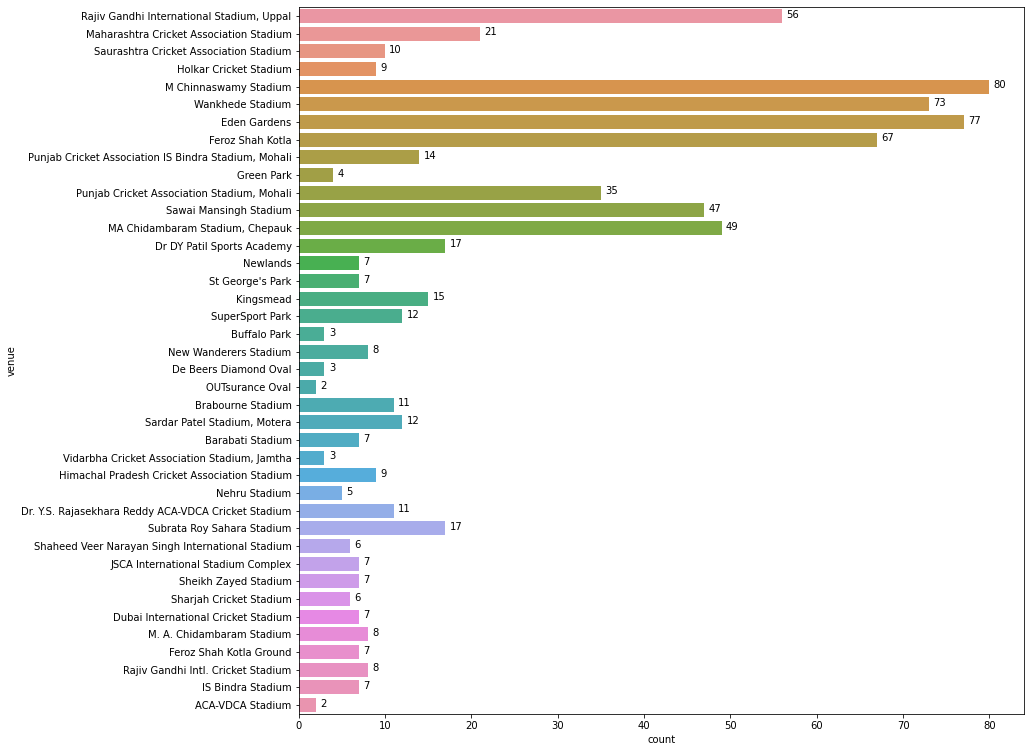

In [30]:
plt.figure(figsize=(13,13))
ax1 = sns.countplot(data=match,y='venue')
for p in ax1.patches:
    ax1.annotate(format(p.get_width()), (p.get_width()+0.5, p.get_y()+0.5))
plt.show()

This graph shows us that M Chinnaswamy Stadium have hosted most number of matches which counts to 80 followed by Eden Garden 77 and Wankhede with 73

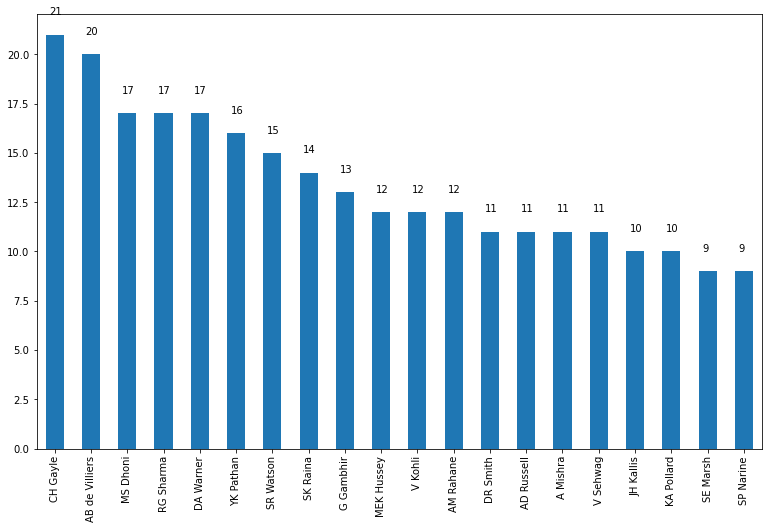

In [31]:
plt.figure(figsize=(13,8))
ax3 = match['player_of_match'].value_counts().head(20).plot.bar()
plt.xticks(rotation ='90')
for p in ax3.patches:
    ax3.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.show()

Here we see that Chris Gayle was player of the match for 21 times followed by AB de Villiers with 20 times

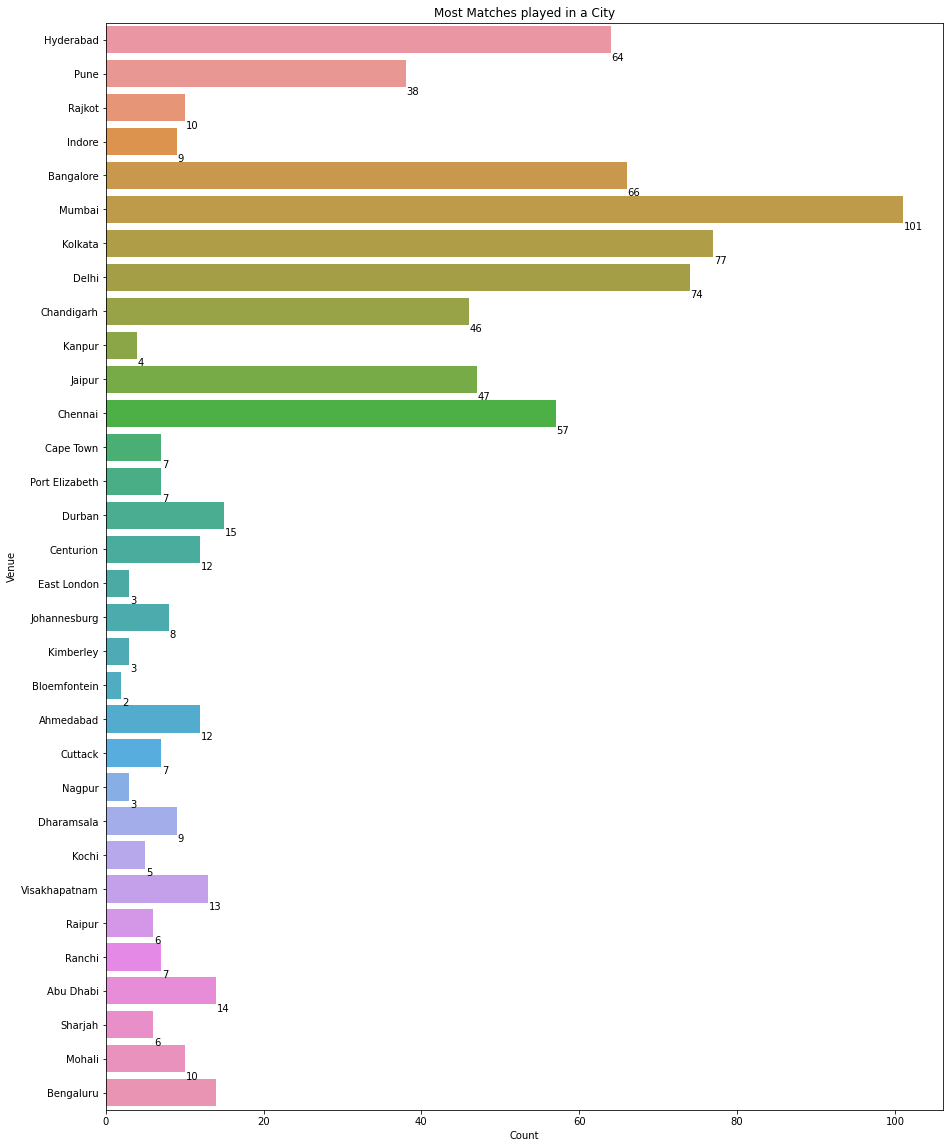

In [32]:
plt.subplots(figsize=(15,20))
ax = sns.countplot(y='city',data = match)
plt.title('Most Matches played in a City')
plt.ylabel('Venue')
plt.xlabel('Count')
for p in ax.patches:
    ax.annotate(format(p.get_width()), (p.get_width()+0.1, p.get_y()+1))
plt.show()

Mumbai have hosted most number of matches which counts to 101 followed by Kolkata with 77 and Delhi with 74

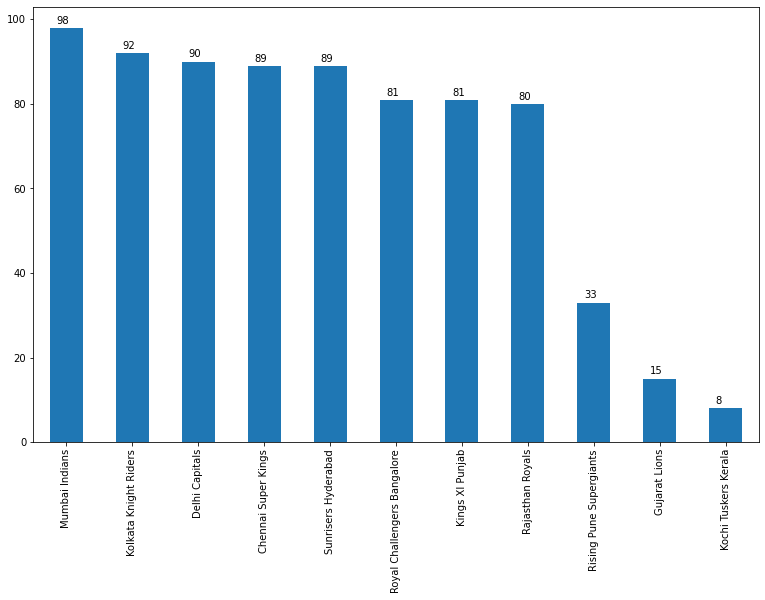

In [33]:
plt.figure(figsize=(13,8))
ax3 = match['toss_winner'].value_counts().head(20).plot.bar()
plt.xticks(rotation ='90')
for p in ax3.patches:
    ax3.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.show()

Here we see that Mumbai Indians have won the tossed most number of times which counts to 98 followeed by Kolkata Knight Riders with 92 and Delhi Capitals with 90

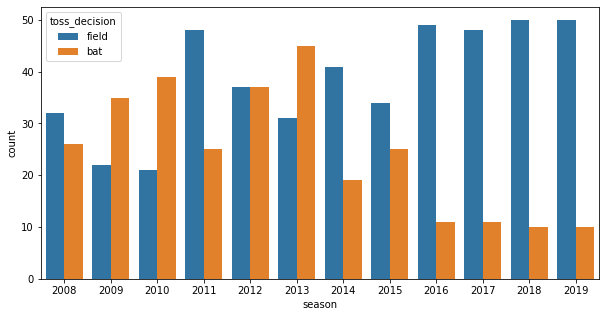

In [34]:
plt.subplots(figsize=(10,5))
sns.countplot(x="season",hue="toss_decision",data=match)
plt.show()

In [37]:
batting_first=match[match['win_by_runs']!=0]
batting_first

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin
8,9,2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,11337,2019,Delhi,28/04/19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan
742,11338,2019,Kolkata,28/04/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,34,0,AD Russell,Eden Gardens,Ian Gould,Nitin Menon
743,11339,2019,Hyderabad,29/04/19,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,45,0,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,O Nandan
745,11341,2019,Chennai,01/05/19,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon


In [38]:
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Sunrisers Hyderabad            48
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Delhi Capitals                 28
Rajasthan Royals               27
Rising Pune Supergiants        13
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

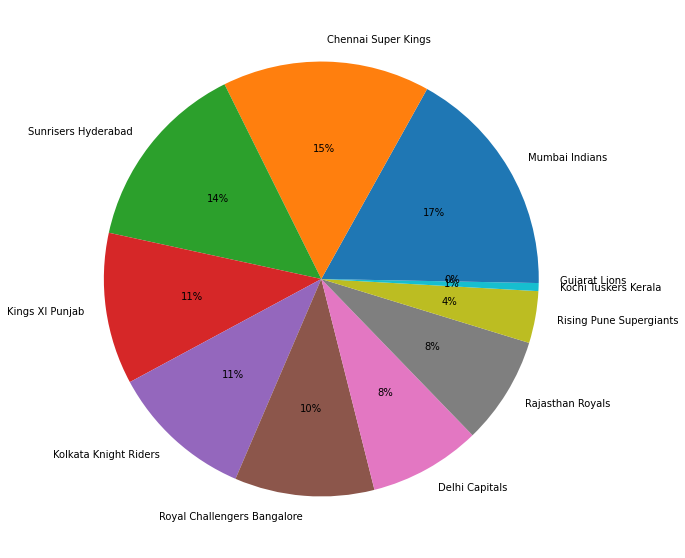

In [39]:
plt.figure(figsize=(10,10))
plt.pie(list(batting_first['winner'].value_counts()[0:]),
        labels = list(batting_first['winner'].value_counts()[0:].keys()),autopct='%1.0f%%')

plt.show()

This pie chart shows that mumbai indians have won the match while batting first most number of time with 17% followed by Chennai Super Kings with 15% followed by Sunrisers Hyderabad with 14 Punjab and Kolkata with 11% each

In [40]:
bat_second=match[match['win_by_wickets']!=0]
bat_second

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05/05/19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,HDPK Dharmasena,C Shamshuddin


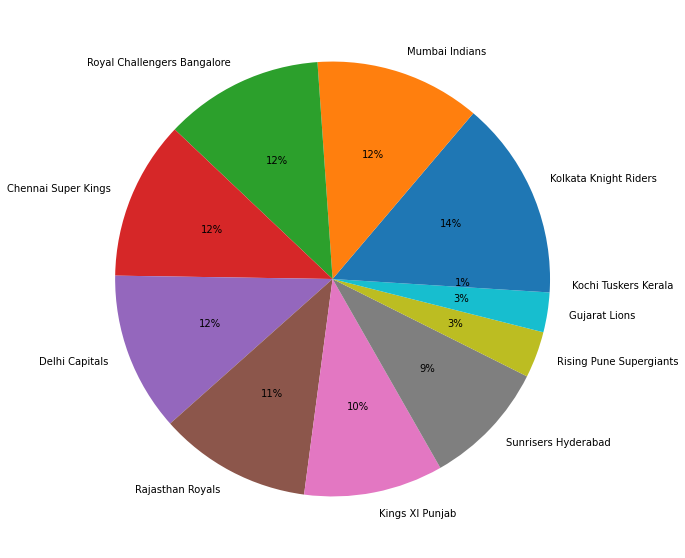

In [41]:
plt.figure(figsize=(10,10))
plt.pie(list(bat_second['winner'].value_counts()[0:]),
        labels = list(bat_second['winner'].value_counts()[0:].keys()),autopct='%1.0f%%')
plt.show()

Here we see that Kolkata Knight Riders have won most number of time while batting second with 14% followed by MI,RCB,DC, and CSK with 12% each.

In [42]:
match['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

# From where we are analysing data about deliveries bowled per match

In [43]:
balls.duplicated().sum()

23

In [44]:
balls.drop_duplicates(inplace=True)

In [45]:
balls.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
dtype: int64

Here we see that we have 170221 records on null values in player_dismissed and fielder so we decided to drop those columns

In [46]:
balls.drop(['player_dismissed','fielder'],axis=1,inplace=True)

In [47]:
balls.isnull().sum()

match_id               0
inning                 0
batting_team           0
bowling_team           0
over                   0
ball                   0
batsman                0
non_striker            0
bowler                 0
is_super_over          0
wide_runs              0
bye_runs               0
legbye_runs            0
noball_runs            0
penalty_runs           0
batsman_runs           0
extra_runs             0
total_runs             0
dismissal_kind    170221
dtype: int64

In [48]:
balls.dismissal_kind.value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [49]:
balls['dismissal_kind'].fillna('caught',inplace=True)

Here we are replacing nulls in dismissal_kind columns with caught

In [50]:
balls.isnull().sum()

match_id          0
inning            0
batting_team      0
bowling_team      0
over              0
ball              0
batsman           0
non_striker       0
bowler            0
is_super_over     0
wide_runs         0
bye_runs          0
legbye_runs       0
noball_runs       0
penalty_runs      0
batsman_runs      0
extra_runs        0
total_runs        0
dismissal_kind    0
dtype: int64

In [51]:
balls.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
balls.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
balls.replace('Pune Warriors','Rising Pune Supergiants',inplace=True)
balls.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)

In [52]:
balls['batting_team'].value_counts()

Mumbai Indians                 22615
Sunrisers Hyderabad            21941
Kings XI Punjab                20929
Royal Challengers Bangalore    20905
Kolkata Knight Riders          20852
Delhi Capitals                 20694
Chennai Super Kings            19761
Rajasthan Royals               17287
Rising Pune Supergiants         8923
Gujarat Lions                   3566
Kochi Tuskers Kerala            1582
Name: batting_team, dtype: int64

This shows which team has played most number of ball. Here we see that MI has played most number of balls with 22615 balls followed by Sunrisers Hyderabad with 21941,Kings XI Punjab with 20929 and Royal Challengers Bangalore with 20905

In [53]:
no_balls_palyed = balls.groupby(['batting_team']).sum()
no_balls_palyed['total_balls']=balls['batting_team'].value_counts()
no_balls_palyed['overs'] = (no_balls_palyed['total_balls']//6)
no_balls_palyed[no_balls_palyed['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(10).reset_index()

,batting_team,overs
0,Mumbai Indians,3769
1,Sunrisers Hyderabad,3656
2,Kings XI Punjab,3488
3,Royal Challengers Bangalore,3484
4,Kolkata Knight Riders,3475
5,Delhi Capitals,3449
6,Chennai Super Kings,3293
7,Rajasthan Royals,2881
8,Rising Pune Supergiants,1487
9,Gujarat Lions,594


If we convert those balls in overs then we see that MI have played 3769 overs followed by Sunrisers Hyderabad with 3656 overs and Punjab with 3488 overs

In [54]:
max_overs = balls.groupby(['bowler']).sum()
max_overs['total_balls']=balls['bowler'].value_counts()
max_overs['overs'] = (max_overs['total_balls']//6)
max_overs[max_overs['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(10).reset_index()

,bowler,overs
0,Harbhajan Singh,575
1,A Mishra,528
2,PP Chawla,526
3,R Ashwin,502
4,SL Malinga,495
5,B Kumar,451
6,DJ Bravo,451
7,P Kumar,439
8,UT Yadav,433
9,SP Narine,433


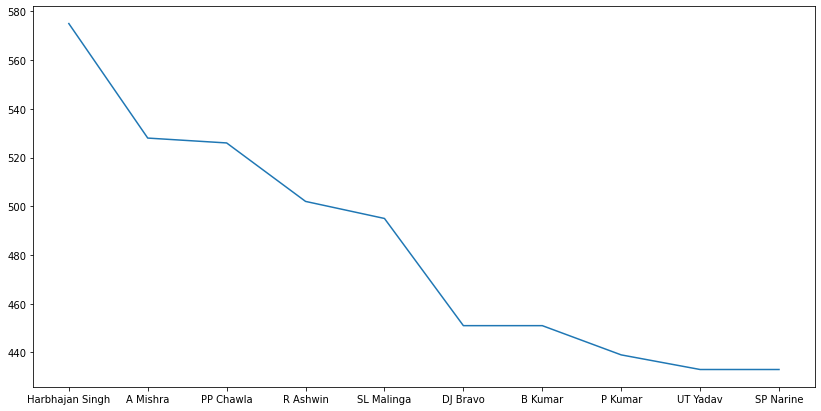

In [55]:
plt.figure(figsize=(14,7))
plt.plot(max_overs['overs'].sort_values(ascending=False)[0:10])
plt.show()

Harbhajan Singh has bowled most number of overs which counts to 575 followed by Amit Mishra with 528 and Piyash Chawla with 526

In [56]:
max_runs=balls.groupby(['batsman'])['batsman_runs'].agg('sum').sort_values(ascending=False).reset_index()
max_runs.head()

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4631


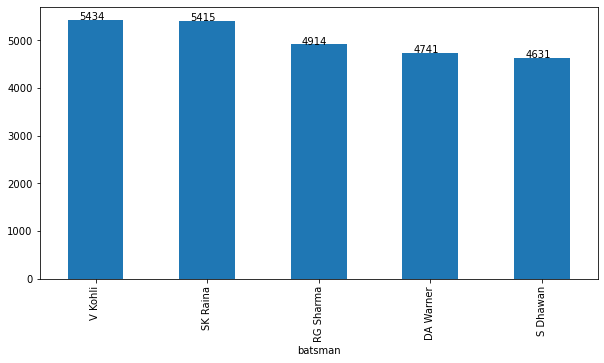

In [57]:
plt.figure(figsize=(10,5))
max_runs=balls.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:5].plot.bar()
# To display the count
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.show()

Kohli have most runs which counts to 5434 followed by Raina with 5415 and Rohit Sharma with 4914

In [58]:
balls['dismissal_kind'].value_counts()

caught                   175569
bowled                     1581
run out                     852
lbw                         540
stumped                     278
caught and bowled           211
retired hurt                 12
hit wicket                   10
obstructing the field         2
Name: dismissal_kind, dtype: int64

In [59]:
best_economy=balls.groupby(['bowler']).sum()
best_economy['total_balls']=balls['bowler'].value_counts()
best_economy['overs']=(best_economy['total_balls']//6)
best_economy['economy_rate']=(best_economy['total_runs']//best_economy['overs'])
best_economy[best_economy['overs']>=200].head().sort_values(by='economy_rate',ascending=True).reset_index()

,bowler,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,total_balls,overs,economy_rate
0,A Mishra,5428006,4908,36354,11346,0,57,6,40,20,0,3727,123,3850,3172,528,7.0
1,A Nehra,640241,2942,17190,7137,0,64,2,40,9,0,2422,115,2537,1974,329,7.0
2,AB Dinda,505007,2273,14072,5814,0,72,8,22,14,0,1987,116,2103,1589,264,7.0
3,AR Patel,5264123,2612,18925,6216,0,37,9,35,0,0,2102,81,2183,1745,290,7.0
4,B Kumar,7260315,4117,24959,9788,0,110,6,73,8,0,3067,197,3264,2707,451,7.0


A Mishra,A Nehra,AB Dinda etc are best bowlers with economy rate of 7.0

In [60]:
batsmen_summary = balls.groupby("batsman").agg({'ball': 'count','batsman_runs': 'sum'})
batsmen_summary.rename(columns={'ball':'balls', 'batsman_runs': 'runs'}, inplace=True)
batsmen_summary = batsmen_summary.sort_values(['balls','runs'], ascending=False)
batsmen_summary.head(10)

,balls,runs
batsman,,
V Kohli,4211,5434
SK Raina,4044,5415
RG Sharma,3816,4914
S Dhawan,3775,4631
G Gambhir,3524,4223
RV Uthappa,3490,4444
DA Warner,3398,4741
MS Dhoni,3318,4477
AM Rahane,3212,3844


In [61]:
batsmen_summary['batting_strike_rate'] = batsmen_summary['runs']/batsmen_summary['balls'] * 100
batsmen_summary['batting_strike_rate'] = batsmen_summary['batting_strike_rate'].round(2)
batsmen_summary.head(10)

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3775,4631,122.68
G Gambhir,3524,4223,119.84
RV Uthappa,3490,4444,127.34
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3212,3844,119.68


#### Here we see that Kohili performance is best with 5434 runs with strike rate of 129.04

# Conclusion


### We see that most team who won the toss are likely to chose to field first
### This graph shows us that M Chinnaswamy Stadium have hosted most number of matches which counts to 80 followed by Eden Garden 77 and Wankhede with 73
### Here we see that Chris Gayle was player of the match for 21 times followed by AB de Villiers with 20
### Mumbai have hosted most number of matches which counts to 101 followed by Kolkata with 77 and Delhi with 74
### Here we see that Mumbai Indians have won the tossed most number of times which counts to 98 followeed by Kolkata Knight Riders with 92 and Delhi Capitals with 
### This pie chart shows that mumbai indians have won the match while batting first most number of time with 17% followed by Chennai Super Kings with 15% followed by Sunrisers Hyderabad with 14 Punjab and Kolkata with 11% each
### Here we see that Kolkata Knight Riders have won most number of time while batting second with 14% followed by MI,RCB,DC, and CSK with 12% each.
### Harbhajan Singh has bowled most number of overs which counts to 575 followed by Amit Mishra with 528 and Piyash Chawla with 526
### Kohli have most runs which counts to 5434 followed by Raina with 5415 and Rohit Sharma with 4914
### Here we see that Kohili performance is best with 5434 runs with strike rate of 129.04